In [1]:
"""Generate the plots for my AAS 2019 jointcal poster.

Run `setup lsst_distrib` before this.

John K. Parejko
"""

'Generate the plots for my AAS 2019 jointcal poster.\n\nRun `setup lsst_distrib` before this.\n\nJohn K. Parejko\n'

In [13]:
import os.path
import glob

import numpy as np
import astropy.units as u

import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('white')  # noqa: E402
seaborn.set_context("poster")

from astropy.visualization import quantity_support
quantity_support()  # noqa: E402

from lsst.verify import Name
from lsst.validate.drp import report_performance

In [3]:
name = Name('validate_drp', 'AM1')

In [4]:
def load_data(kind):
    """Load data from validate_drp output json files."""
    files = glob.glob(os.path.join(kind, '*.json'))
    metrics = report_performance.ingest_data(files, 'verify_metrics')
    metric = metrics['HSC-R']
    mm = metric.measurements[name]
    data = mm.blobs['MatchedMultiVisitDataset']
    amodel = mm.blobs['AnalyticAstrometryModel']
    pmodel = mm.blobs['AnalyticAstrometryModel']
    return data, amodel, pmodel

In [9]:
# load the data and extract the parts we want
jointcal, amodel, pmodel = load_data('jointcal')
single, amodel, pmodel = load_data('single')
bright_jointcal = jointcal['snr'].quantity.value > amodel['brightSnr'].quantity
bright_single = single['snr'].quantity.value > amodel['brightSnr'].quantity
d1 = jointcal['dist'].quantity[bright_jointcal]
d2 = single['dist'].quantity[bright_single]
m1 = jointcal['magrms'].quantity[bright_jointcal]
m2 = single['magrms'].quantity[bright_single]

In [5]:
# generic figure stuff
bins = 50
labels = ['jointcal', 'processCcd']

In [6]:
# color cycling
i = 0
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

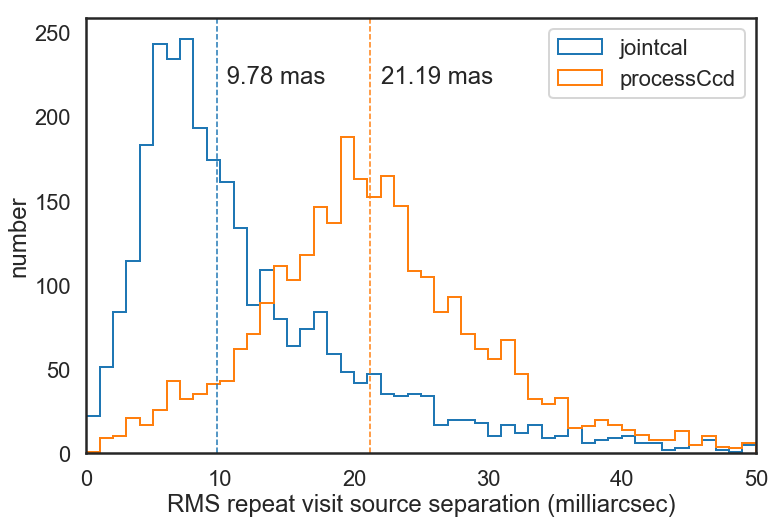

In [14]:
# astrometry
xlim = (0, 50)
plt.figure(figsize=(12, 8))
plt.hist(d1, bins=bins, range=xlim, histtype='step', label=labels[0], lw=2, color=cycle[i])
plt.hist(d2, bins=bins, range=xlim, histtype='step', label=labels[1], lw=2, color=cycle[i+1])
plt.axvline(np.median(d1), lw=1.5, ls='--', color=cycle[i])
plt.text(10, 220, "%5.2f mas"%np.median(d1.value))
plt.axvline(np.median(d2), lw=1.5, ls='--', color=cycle[i+1])
plt.text(22, 220, "%5.2f mas"%np.median(d2.value))
plt.xlim(xlim)
plt.xlabel('RMS repeat visit source separation (milliarcsec)')
plt.ylabel('number')
plt.legend()
plt.savefig('astrometry-hist.svg', bbox_inches='tight')

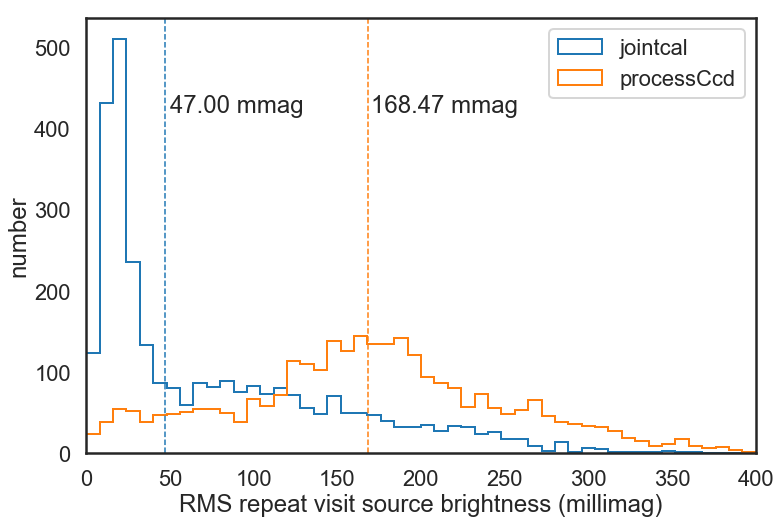

In [15]:
xlim = (0, 400)
plt.figure(figsize=(12, 8))
plt.hist(m1.to(u.mmag), bins=bins, range=xlim, histtype='step', label=labels[0], lw=2, color=cycle[i])
plt.hist(m2.to(u.mmag), bins=bins, range=xlim, histtype='step', label=labels[1], lw=2, color=cycle[i+1])
plt.axvline(np.median(m1), lw=1.5, ls='--', color=cycle[i])
plt.text(50, 420, "%5.2f mmag"%np.median(m1.to_value(u.mmag)))
plt.axvline(np.median(m2), lw=1.5, ls='--', color=cycle[i+1])
plt.text(170, 420, "%5.2f mmag"%np.median(m2.to_value(u.mmag)))
plt.xlim(xlim)
plt.xlabel('RMS repeat visit source brightness (millimag)')
plt.ylabel('number')
plt.legend()
plt.savefig('photometry-hist.svg', bbox_inches='tight')